# CHAPTER 12 - Quantifying Uncertainty 

### Instructor: Brandon Haworth


#### Notebook Credit: George Tzanetakis
Jupyter Notebooks you encounter during the course were largely developed by Prof. Tzanetakis from a previous iteration of this course. I've since changed/developed them where necessary for my own iterations of CSC 421.

WHY?
* Laziness: too much work to completely cover every possible expectation 
* Theoretical ignorance 
* Practical ignorance: missing evidence, noisy observations, unexpected changes 

Probability is the primary formalism for dealing with uncertainty 

* Degree of belief  (sentence is true or false)
    * There is a pit at square (2,2)
    
* Ace of spades example:
    * No knowledge (1/52) 
    * Color  (1/26) 
    * Suit (1/13 ) 


Note: Alternative: Fuzzy Logic – degree of truth “This towel is wet” 
            
In this notebook, we will explore discrete random variables and sampling. After defining a helper class and associated functions, we can create both symbolic and numeric random variables and generate samples from them. 


**IMPORTANT:** Probability is also the primary way one can connect computers and especially AI systems with other fields of science, engineering, humanities etc. 

# CONTENTS

1. [Workplan](#workplan) 
2. [Probability](#probability)
3. [Random Variables and Sampling](#random_variables)
4. [Joint Probability Distribution](#joint_probs)
5. [Conditional Probabilities](#conditional_probs)

<a id='workplan'></a> 

# WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example, the Expected reading includes the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **12.1**, **12.2**, **12.3**, **12.4**, **12.5**, **12.6**, and **Summary**
2. Expected: Same as Basic 
3. Advanced: All of the chapter including bibliographical and historical notes 




# Probablity Introduction 

### Sidenote about language confusion: Monty Hall problem 
    
    
Three closed doors one of which hides the car of your dreams. Behind each of the other two goats. You will choose a door and win whatever is behind it. You decide on a door and announce your choice, whereas the host opens one of the other two doors and reveals a goat. He then asks if you would like to switch your choice or not. What should you do? 

https://en.wikipedia.org/wiki/Monty_Hall_problem
    

## Probability 

* Primitive instinctive probability 
    * Dark clouds today mean rain is likely since it has rained in the past when the clouds had that look  
* Formal theory 17-century Correspondance between B. Pascal and P. Fermat about gambling 

Pervasive in all sciences. Knowledge of probability is critical for any CS practitioner. 

## Sample spaces, events, worlds

* A = {(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)}
* Rolling a seven with a pair of dice
* Experiment gives rise to sample space
* Discrete sample spaces (infinite but countable)
* Probability distribution = associating each of the discrete outcomes with a number between 0 and 1. The sum of all the outcomes must add up to 1. 

Car-goat 
* Assume you switch S = {(1,2,3,L), (1, 3, 2, L), (2, 3, 1, W), (3, 2, 1, W)} 
* Door you choose, door hosts opens, door you switch to, win/loss 

## Making decisions under uncertainty 

Suppose I believe the following: 
* P(30min  gets me there on time) = 0.04
* P(1 hr gets me there on time) = 0.70
* P(24 hrs gets me there on time) = 0.98

* Which action to choose? Depends on my preferences
* Utility theory = represent preferences
* Decision theory = utility theory + probability theory

## Probability Theory 


* Set $\Omega$  – the sample space 
* $\omega \in \Omega$ is a sample point/atomic event, outcome, possible world 
* A probability space/model is a sample space with an assignment $P(\Omega)$ for every point such that 
    * $0.0 \leq P(\omega) \leq 1.0$
    * $\sum_{\omega} P(\omega) = 1.0$ 
    
An event is a subset of $\Omega$. 


### Random variables 

* A random variable is a function from sample points to some range e.g the reals or booleans e.g. 
* Odd(1) = true 
* P induces a probability distribution for any r.v X 
    * $P(Odd = true) = P(1) + P(3) + P(5) = \frac{1}{2}$ 
    
Random Variables represent a “part” of the world whose “status” is initially unknown. Each random variable has a domain that it can take on. For example, the RV Weather can have the values: sun, rain, cloud, snow. Domains can be boolean, discrete, or continuous.




Probabilities are assigned over values in the domain. 

The notation P(Weather) denotes a vector of values for the probabilities of each individual state of the weather: 

* $ P(Weather = sunny) =0.65$ 
* $ P(Weather = rain) =0.25 $
* $ P(Weather = cloudy)=0.07 $
* $ P(Weather = snow) = 0.03 $ 
* $P(Weather) = (0.65,0.25,0.07,0.03)$

### Proposition 

* Think of a proposition as the event (set of sample points) where the proposition is true 
* Given boolean random variables A, B
* Event a = set of sample points where A(w ) = 1 
* Often in AI sample points are defined by the values of a set of random variables i.e., the sample space is the Cartesian product of the ranges of the variables 
* With boolean variables sample point = propositional logic model A = true, B = false

### Frequentist interpretation 

An event’s probability is the limit of its relative frequency in a large number of trials. This connects to statistics and empirical experiments. The initial classical definition of probability was based on physical idealized symmetry (dice, coins, cards). The axiomatic formulation of probability by Kolmogorov (1903-1987) in 1933 focuses on operations on probability values rather than the initial assignment of values.



<img src="images/frequentists_bayesians.png" width="60%"/>


**Note**: Probability theory helps us calculate unknown probabilities of events based on known probabilities of other events. How the numbers are assigned to particular events is problem and domain-dependent. They can be assigned based on degrees of belief or they can be estimated by statistical frequency of occurrence.


# Random variables and sampling

The probabilities associated with every possible value of a random variable constitute a probability distribution. The process of selecting a value randomly according to the probability distribution is called sampling. It can be viewed as a process of generating a sequence of random samples and it can help us better understand how a particular probabilistic model works.


Define a helper random variable class based on the scipy discrete random variable functionality providing both numeric and symbolic RVs 

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 

In [14]:


class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
            
        

Let's first create some random samples of symbolic random variables corresponding to a coin and a dice 

In [15]:
values = ['Alice', 'Bob']
probabilities = [0.5, 0.5]
coin = Random_Variable('Coin', values, probabilities)
print(coin.name)
samples = coin.sample(10)
print(samples)


def length(samples): 
    length=0
    for x in samples: 
        length = length+1 
    return length
    
print(length(samples))
print(len(samples))


Coin
['Bob', 'Bob', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Bob', 'Bob']
10
10


In [16]:
values = ['1', '2', '3', '4', '5', '6']
probabilities = [1/6.] * 6
probabilities = [1/6., 1/6., 1/6., 1/6., 1/6., 1/6.]
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(30)
print(samples);


['2', '1', '2', '2', '3', '4', '4', '3', '1', '3', '1', '1', '3', '4', '4', '5', '6', '4', '5', '5', '6', '1', '1', '4', '2', '6', '1', '5', '2', '4']


Now let's look at a numeric random variable corresponding to a dice so that we can more easily make plots and histograms

In [17]:
values = np.arange(1,7,dtype=np.int64) #note half-open interval [start, stop)
probabilities = [1/6.] * 6
print(values)

[1 2 3 4 5 6]


[1 4 3 4 4 6 4 2 4 5]


<StemContainer object of 3 artists>

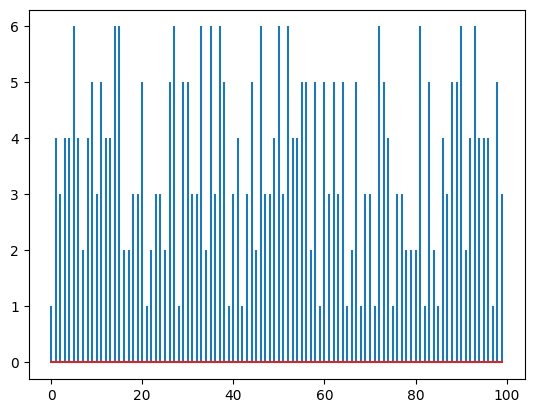

In [18]:
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(100)
print(samples[0:10])
plt.stem(samples, markerfmt= ' ')

Let's now look at a histogram of these generated samples. Notice that even with 500 samples the bars are not equal length so the calculated frequencies are only approximating the probabilities used to generate them 

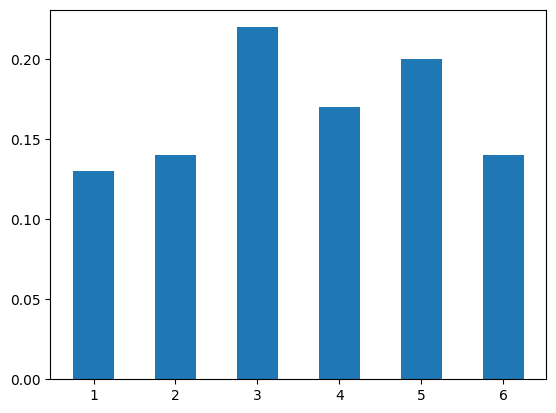

In [19]:
plt.figure()
plt.hist(samples,bins=[1,2,3,4,5,6,7],density=1, rwidth=0.5,align='left');

Let's plot the cumulative histogram of the samples 

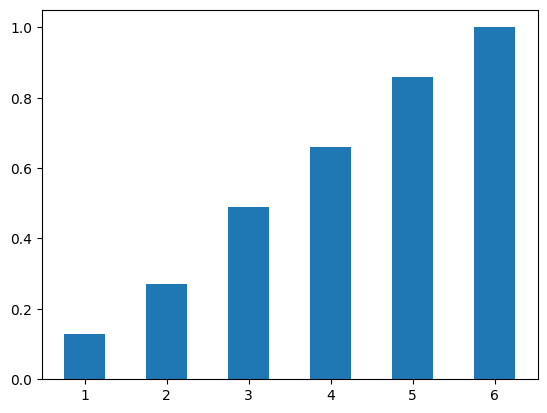

In [20]:
plt.hist(samples,bins=[1,2,3,4,5,6,7],density=1, rwidth=0.5,align='left', cumulative=True);

Let's now estimate the frequency of the event *roll even number* in different ways. 
First, let's count the number of even numbers in the generated samples. Then let's 
take the sum of the counts of the individual estimated probabilities. 


In [21]:
# we can also write the predicates directly using lambda notation 
samples = dice.sample(100)
est_even = len([x for x in samples if x%2==0]) / len(samples)

In [22]:
est_2 = len([x for x in samples if x==2]) / len(samples)
est_4 = len([x for x in samples if x==4]) / len(samples)
est_6 = len([x for x in samples if x==6]) / len(samples)
print(est_even)
# Let's print some estimates 
print('Estimates of 2,4,6 = ', (est_2, est_4, est_6))
print('Direct estimate = ', est_even) 
print('Sum of estimates = ', est_2 + est_4 + est_6)
print('Theoretical value = ', 0.5)


# directly count rather than using list comprehension
est_2 = 0 
for x in samples: 
    if x == 2: est_2 = est_2 + 1 
print('Estimate for 2:', est_2/len(samples))


0.53
Estimates of 2,4,6 =  (0.19, 0.16, 0.18)
Direct estimate =  0.53
Sum of estimates =  0.53
Theoretical value =  0.5
Estimate for 2: 0.19


Notice that we can always estimate the probability of an event by simply counting how many times it occurs in the samples of an experiment. However, if we have multiple events we are interested in then it can be easier to calculate the probabilities of the values of individual random variables and then use the rules of probability to estimate the probabilities of more complex events. This is particularly useful when there are very few (or none) cases in our "training" data in which the event occurs. 



## Sidenote I: A probabilistic view of machine learning 


The basic recipe: 

* Describe how the data is generated and the assumptions you make using a probabilistic model 
* Estimate the parameters of the probabilistic model using available data (the learning part) 
* Use the estimated probabilistic model to perform various tasks. 
* Evaluate how well the model performs 


Some important observations: 

* Understanding notation in addition to the underlying concepts is important 
* Separating model from inference 
* Understanding the connection between statistics and probability 
* Thinking the generative way 
* Probabilistic modeling is all about how to calculate probabilities of events that are “hard” to estimate from probabilities of events that are “easier” to estimate 
* Focus on the basic concepts and don’t get bogged down in the implementation details and the multiple variants 
* Misleading use of language is frequently why probability problems can be difficult (for example Monty Hall). In most applications that’s not a problem.




## Probabilities 

Let's look at some simple visualizations that can help us get some intuition about 
probabilities and statistics by looking at some specific examples. We will use a grid 
visualization to help us better undertstand the numbers. It is a simple way of visualizing a probability using a grid of colored cells. 





In [23]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import numpy as np

# plot a xmax by ymax grid of rectangles and use it do visualize 
# probabilities 

def plot_prob_grid(xmax, ymax, prob, title): 
    X = np.arange(0.5, xmax, 1)
    Y = np.arange(0.5, ymax, 1)
    num_grid_points = xmax * ymax 
    C = ['blue']*num_grid_points 
    grid = np.meshgrid(X, Y)
    positions = np.vstack(list(map(np.ravel, grid)))
    X = positions[0]
    Y = positions[1]
    prob_grid_points = int(prob * num_grid_points)
    C[0:prob_grid_points] = ['orange']*prob_grid_points
    z = figure(title=title, 
           toolbar_location='above', x_range=[0,xmax], 
           y_range=[0,ymax], toolbar_sticky=False, x_axis_location="below", width=600, height=600)

    z.rect(X, Y, width=1, height=1,fill_color=C, 
           line_color="white")
    
    return z

In [24]:
# let's try visualizing a probability of 0.25 using a grid of 100x100 as well as a grid of 20x20
output_notebook()
z = plot_prob_grid(100,100,0.25, "Prob = 0.25")
show(z)


z = plot_prob_grid(20,20,0.25,"Prob 0.25")
show(z)

Loading BokehJS ...

<a id='joint_probs'></a> 

# Joint Probability Distributions

Complete set of RVs used to describe the problem can be represented as
the joint probability distribution. For example the joint distribution 
$P(Weather,Cavity, Toothache)$ can be represented as a $2 x 2 x 4$ table. 

### Marginal, joint and conditional 

|  ---   | CSC         | SENG        |
|--------| ----------- | ----------- |
|CSC421  |  150        | 50          |
|SENG350 |  80         | 20          |


\begin{align*} 
& P(\mbox{X is CSC}) = \frac{150+80}{150+80+50+20} = \frac{230}{300} \approx 0.77  \\
& P(\mbox{X is SENG and X in CS421}) = \\ 
& P(SENG, CSC421) = \frac{50}{300} \approx 0.17 \\ 
& P(\mbox{X is SENG if we know that X is in CSC421}) = \\ 
& P(SENG \vert CSC421) = \frac{50}{200} = 0.25 
\end{align*} 









In [25]:
# Now let's use the same visualization to examine some probabilities 
# derived from actual data related to the Covid pandemic in BC 

covid_deaths_bc = 2000 
bc_population = 5000000
covid_recovered_bc = 164000
covid_death_perc_bc = covid_deaths_bc / bc_population
print(covid_death_perc_bc)
covid_recovered_perc_bc = covid_recovered_bc / bc_population

z = plot_prob_grid(100,100,covid_death_perc_bc, 'Covid Deaths BC')
show(z)

z = plot_prob_grid(100,100,covid_recovered_perc_bc, 'Covid Recovered BC')
show(z)

0.0004


## Inference 

When we have a probabilistic model we can make predictions, learn about the values of some random variables given the values of others, and in general, answer any possible questions that can be stated about the random variables. The probabilistic model expresses the set of assumptions we are making about the problem we are trying to solve and our uncertainty about them is expressed through probabilities. Typically we will know the values of some random variables in our model (evidence) and based on this knowledge we will want to infer something about the probability distribution of some other variables.

## Product Rule 

We have seen that: 
* $P(hasLyrics,genre) = P(genre)P(hasLyrics \vert genre)$ 

This is an example of the product rule: $P(A,B) = P(A)P(B \vert A)$

## Sum Rule 

We can sum the joint probabilities for all possible values of genre to “eliminate” that variable. 

* $\sum_{hasLyrics} P(hasLyrics,genre = country) = P(genre = country)$. 

More generally using short-hand notation we can express that this holds for all values of genre : 

* $\sum_P{hasLyrics} P(hasLyrics,genre) = P(genre)$.


More generally the sum rule of probability states: $\sum_{B} P(A,B) = P(A)$ 

In this context, the distribution $P(A)$ is known as the marginal distribution for $A$ and the act of summing out $B$ is called marginalisation.



## Sum and product rules 

The sum and product rules are very general. They apply not just when $A$ and $B$ are binary random variables, but also when they are multi-state random variables, and even when they are continuous (in which case the sums are replaced by integrations). Furthermore, A and B could each represent sets of several random variables. For example if $B = C,D$: 

* $P(A,C,D) = P(A)P(C,D|A)$ 
* $P(A) = \sum_{C} \sum_{D} P(A,C,D)$

## Inference using full joint distribution


Let's consider another example where the full joint distribution $2 x 2 x 2$ is given. 



|---| toothache and catch    | toothache and not catch | not toothache and catch | not toothache and not catch | 
|---|-------   | ----------| ------| ----------|
|cavity | 0.108 | 0.012 | 0.072 | 0.008 | 
| not cavity | 0.016 | 0.064 | 0.144 | 0.576 | 


Direct way to evalute the probability of any proposition: 
* Identify the possible worlds in which a proposition is true and add up their probabilities 
* $P(cavity \lor toothache) = 0.108 + 0.012 + 0.072 + 0.008 + 0.016+ 0.064 = 0.28$ 
* **Marginal probability** of cavity: 
* $P(cavity) = 0.108 + 0.012 + 0.072 + 0.008 = 0.2$ 



<a id='conditional_probs'></a> 

# Conditional probabilities 

We explore conditional probabilities using an example from music. Imagine that you have a collection of tracks consisting of two genres: country and jazz. Some tracks have lyrics and some have not i.e they are instrumental. It makes sense that the probability of a song being instrumental depends on whether the song is jazz or country. This can be modeled through conditional probabilities.

We can simulate the generation process of conditional probabilities by appropriately sampling from three random variables.

Suppose we introduce another random variable hasLyrics with two values: no and yes. We expect that more country songs will have lyrics than jazz songs. That means that the probability distribution of hasLyrics depends on whether the genre is country or jazz. This is known as a conditional probability distribution and is notated as follows: $P(hasLyrics = no|genre = jazz) = 0.9$ This implies that $P(hasLyrics = yes|genre = jazz) = 0.1$

If genre = country then we have: $P(hasLyrics = no \vert genre = country) = 0.2$ We can use the short-hand notation $P(hasLyrics \vert genre)$ to denote the conditional probability distribution that in this case can be specified by providing four probabilities (or two using normalization). We will call these numbers and in general, any numbers used to “specify” a particular probabilistic model parameter and use $\theta$ to denote a vector containing them.

We can display all the relevant probabilities using a conditional probability table. Notice that the sum of row entries must be equal to 1 but NOT the sum of column entries. 

| Lyrics/Genre | no  | yes |
|--------------|-----|-----|
| country      | 0.2 | 0.8 |
| jazz         | 0.9 | 0.1 |

|              | jazz | country | 
|--------------|---------|------|
| Genre        | 0.3   | 0.7 |
----------------------------------



## Independence and conditional independence 

Let's look at another example: 
<br> 
$A$ and $B$ are independent iff $P(A | B) = P(A)$ or $P(B|A) = P(B)$ or $P(A,B) = P(A) P(B)$

Absolute independence is powerful but rare. 


* $P(catch | toothache, cavity) = P(catch| cavity)$
* $P(catch | toothache, not cavity) = P(catch| not cavity)$ 

Catch is conditionally independent of Toothache given Cavity (note the use of capital letters to indicate random variables: 

* $P(Catch | Toothache, Cavity) = P(Catch|Cavity)$


**MOST BASIC AND ROBUST FORM OF KNOWLEDGE ABOUT UNCERTAINTY**



**Note about notation** 

Frequently when notating a conditional probablity distribution the short hand $P(hasLyrics|genre)$ is used. Conceptually this expands to all possible combinations of values of the two random variables involved. Also some times when the values of random variables in a problem are unique the name of the random variable is omitted i.e P(country) instead of P(genre = country). It is important to keep in mind these conventions as our examples get more complicated.


In [27]:
# samples to generate 
num_samples = 1000

## Prior probabilities of a song being jazz or country 
values = ['country', 'jazz']
probs = [0.7, 0.3]
genre = Random_Variable('genre',values, probs)

# conditional probabilities of a song having lyrics or not given the genre 
values = ['no', 'yes']
probs = [0.9, 0.1] 
lyrics_if_jazz = Random_Variable('lyrics_if_jazz', values, probs)

values = ['no', 'yes']
probs = [0.2, 0.8]
lyrics_if_country = Random_Variable('lyrics_if_country', values, probs)

# conditional generating proces first sample prior and then based on outcome 
# choose which conditional probability distribution to use 

random_lyrics_samples = [] 
for n in range(num_samples): 
    # the 1 below is to get one sample and the 0 to get the first item of the list of samples 
    random_genre_sample = genre.sample(1)[0]
    # depending on the outcome of the genre sampling sample the appropriate 
    # conditional probability 
    if (random_genre_sample == 'jazz'): 
        random_lyrics_sample = (lyrics_if_jazz.sample(1)[0], 'jazz')
        # random_lyrics_sample = (lyrics_if_jazz.sample(1)[0])

    else: 
        random_lyrics_sample = (lyrics_if_country.sample(1)[0], 'country')
        # random_lyrics_sample = (lyrics_if_country.sample(1)[0])

    random_lyrics_samples.append(random_lyrics_sample)

# output 1 item per line and output the first 20 samples 
for s in random_lyrics_samples[0:100]: 
    print(s)

('yes', 'country')
('no', 'jazz')
('no', 'country')
('no', 'jazz')
('no', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('no', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'country')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('no', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'country')
('yes', 'country')
('no', 'country')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('no', 'country')
('yes', 'country')
('yes', 'country'

Notice that we have generated samples of whether the song has lyrics or not. Above I have also printed the associated genre label. In many probabilistic modeling problems some information is not available to the observer. For example we could be provided only the yes/no outcomes and the genres could be "hidden".

Now let's use these generated samples to estimate probabilities of the model. Basically we pretend that we don't know the parameters and estimate them directly by frequency counting through the samples we generated.

In [28]:
# First only consider jazz samples 
jazz_samples = [x for x in random_lyrics_samples if x[1] == 'jazz']
for s in jazz_samples[0:20]: 
    print(s)

('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')


Now that we have selected the samples that are jazz we can simply count the lyrics yes and lyrics no entries and divide them by the total number of jazz samples to get estimates of the conditional probabilities. Think about the relationships: we can use the data to estimate the parameters of a model (learning), we can use the model to generate samples (generation), and we can use the model to calculate probabilities for various events (inference).

We can also calculate the probability of a song being jazz if we know that it is instrumental is 0.66.$$
P(genre = jazz | hasLyrics = no) = \frac{0.3 * 0.9}{0.3 * 0.9 + 0.7 * 0.2} = 0.66
$$

This is based on our knowledge of probabilities. If we have some data we can also estimate this probability directly. This is called approximate inference in contrast to the exact inference of $0.66$. When problems become complicated exact inference can become too costly to compute while approximate inference can provide reasonable answers much faster. We will see that later when examining probabilistic graphical models. As you can see in this case both the exact and approximate inference probability estimates are relatively close.

In [16]:
est_no_if_jazz = len([x for x in jazz_samples if x[0] == 'no']) / len(jazz_samples)
est_yes_if_jazz = len([x for x in jazz_samples if x[0] == 'yes']) / len(jazz_samples)
print(est_no_if_jazz, est_yes_if_jazz)

0.890728476821192 0.10927152317880795


In [17]:
no_samples = [x for x in random_lyrics_samples if x[0] == 'no']
est_jazz_if_no_lyrics = len([x for x in no_samples if x[1] == 'jazz']) / len(no_samples)
print(est_jazz_if_no_lyrics)

0.6404761904761904


Recall that The process of obtaining revised probability distributions after the values of some random variables have been observed, is called inference. Let’s look at an example. We know that the probability of a song is jazz is $30\%$. Suppose that we observe that the song does not have lyrics. How does this evidence affect the probability that the song is jazz ? We have:


* $P(genre = jazz|hasLyrics = no) = \frac{0.3 ∗ 0.9}{0.3∗0.9+0.7∗0.2} \approx 0.66 $ 


Notice that this posterior probability after incorporating evidence is more than twice the original prior probability.

## Bayes Rule 

* $P(a|b) = P(b|a) P(a) / P(b) $ 

How can you prove it ? 

In distribution form (random variables - basically a template generating specific equations):  
* $P(A|B) = \frac{P(B|A) P(A)}{P(B)}$
* $P(A=1, B=H) = \frac{P(B=H|A=1)P(A=1)}{P(B=H)}$

Diagnostic probability from causal probability

* $P(Cause |Effect) = P(Effect|Cause) P(Cause) / P(Effect)$
* M menigitis, S stiff neck with: 

* $P(M) = 0.0001, P(S|M) = 0.8, P(S) = 0.1, P(M|S) = ?$

* Why is this useful ? Are diagnostic rules or causal rules harder to estimate ? 



## Conditional Probability Notation 

\begin{eqnarray}
P(X = x_1, Y = y_1) = P(X = x_1 \vert Y = y_1) P(Y=y1) \\ 
P(X = x_1, Y = y_2) = P(X = x_1 \vert Y = y_2) P(Y=y2) \\ 
\dots 
\end{eqnarray}
can be combined with the notation denoting a set of equations: 
\begin{equation} 
{\bf P}(X,Y) = {\bf P}(X \vert Y) {\bf P}(Y)
\end{equation} 




## Bayes example 

Suppose $C$ is a rv corresponding to people with covid in a population 
and $O$ is a rv corresponding to a particular age group (let's say above 70). 
We have the following data: 
$P(C) = 0.001$, $P(O \vert C) = 0.9$, $P(O \vert \hat C)=0.21$. $P(C \vert O)$ corresponds to the probability of getting covid if you are old and can be calculated using the Bayes theorem: 

\begin{equation} 
P(C \vert O) = \frac{P(O \vert C)P(C)}{P(O)} = \frac{0.0009}{0.9 * 0.001 + 0.21 * 0.999} = 0.0043 
\end{equation} 

**NOTE: these numbers are made up and are not connected to actual Covid data**


Bayes theorem allows us to ``choose'' in a particular problem the
conditional probabilities that are easier to calculate from data. For example it
is easier to obtain the probability that someone who has covid 
is old than the probability that someone who is old has lung covid. 
It also allows us to quickly update probabilities when knowledge about the problem 
changes. For example suppose that the number of cases increase significantly after 
relaxing some public health measures. This for example could affect $P(C)$ without affecting the other numbers. 




## Naïve Bayes Model 

Commonly occuring pattern in which a single cause directly influences a number of effects all of which are conditionally independent. 


<img src="images/naive_bayes_net.png" width="60%"/>



# Bayes Classification 


$P(Y \vert X) = \frac{P(X \vert Y)P(Y)}{P(X)}$ 

where Y is the class label and X is the feature vector. Notice that this is a set of equations, one for each class label in Y. Therefore there will be L posterior probabilities one for each class. To classify a test instance a Bayesian classifier computes these posterior probabilities and selects the class label corresponding to the maximum posterior. The main challenge becomes how to estimate $P(X \vert Y)$ from the labelled training samples. For each class the corresponding training samples are used to estimate the parameters of the corresponding pdfs.

# Summary 

* Uncertainty arises because of finite resources and sensor noise. It is inescapable in complex, non-deterministic, or partially observable environments. 
* Probabilities express the agent's inability to reach a definite decision regarding the truth of a sentence. Probabilities summarize the agent's beliefs relative to the current evidence.
* Decision theory combines the agent's beliefs and goals, defining the best action as the one that maximizes expected utility
* Basic probability statements include **prior probabilities** and **conditional probabilities** over simple and complex propositions.
* The axioms of probability constrain the possible assignments of probabilities to propositions. An agent that violates the axioms must behave irrationally in some cases.
* The **full joint probability distribution** specifies the probability of each complete assignment of values to random values. It is usually too large to create or use in its explicit form, but when it is available it can be used to answer queries simply by adding up entries for possible worlds corresponding to the query propositions.
* **Absolute independence** between subsets of random variables allows the full joint distribution to be factored into a smaller joint distribution, greatly reducing its complexity. Absolute independence seldom occurs in practice.
* **Bayes' rule** allows unknown probabilities to be computed from known conditional probabilities usually in the causal direction. Applying Bayes rule with many pieces of evidence runs into the same scaling problems as does the full joint distribution.
* **Conditional independence** brought about by direct causal relationships in the domain might allow the full joint distribution to be factored into smaller, conditional distributions.
* The **naive Bayes** model assumes the conditional independence of all effect variables, given a single cause variable, and grows linearly with the number of effects.
